In [1]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [4]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

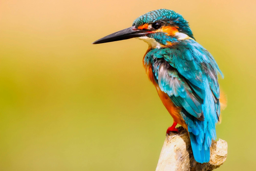

In [5]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

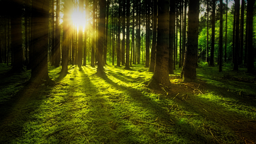

In [7]:
download_url(search_images('forest photos', max_images=2)[1], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [7]:
path = Path('Arboles_autoctonos')

In [69]:
searches = 'Quercus ilex', 'Quercus petraea', 'Quercus faginea', 'Pinus sylvestris', 'Pinus nigra', 'Juniperus thurifera', 'Fagus sylvatica', 'Fraxinus angustifolia', 'Populus tremula', 'Taxus baccata','Betula pendula', 'Ilex aquifolium', 'Ulmus minor'
path = Path('Arboles_autoctonos')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}', max_images=300))
    resize_images(path/o, max_size=400, dest=path/o)

OSError: [Errno 22] Invalid argument: 'C:\\Users\\ASUS\\Arboles_autoctonos\\Ulmus minor\\b5e337e8-faaa-4d85-b874-bfa88d639622.jpg'

In [70]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

55

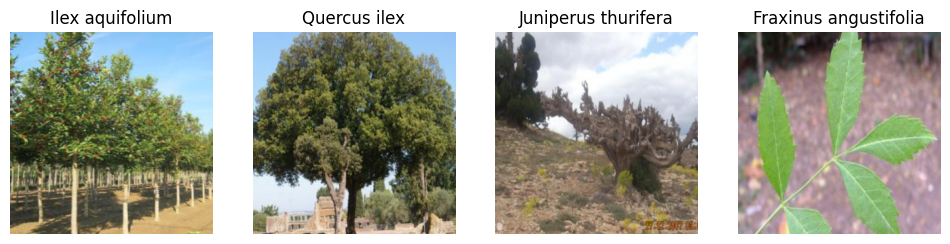

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192)]
)

batch_tfms = aug_transforms(
    do_flip=True,
    flip_vert=True,  # Voltear verticalmente
    max_rotate=30.0,  # Rotar la imagen hasta 30 grados
    max_zoom=1.1,  # Zoom máximo del 10%
    max_lighting=0.2,  # Variación en la iluminación
    max_warp=0.2  # Variación en la distorsión de la imagen
)
dls = dls.new(item_tfms=RandomResizedCrop(299, min_scale=0.5), batch_tfms=batch_tfms)

dls = dls.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)



In [20]:
import timm
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(5, base_lr=0.0010000000474974513, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,3.269298,1.847827,0.593279,40:21
1,2.287397,1.217223,0.395133,36:46
2,1.742547,1.027817,0.327926,37:07


epoch,train_loss,valid_loss,error_rate,time
0,1.209496,0.900463,0.303592,48:06
1,1.076580,0.760257,0.252607,46:07
2,0.955845,0.666354,0.203940,49:09
3,0.863498,0.647371,0.195829,49:28
4,0.802441,0.634186,0.203940,49:41


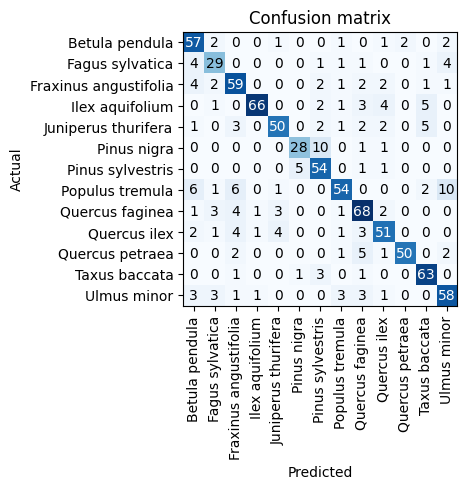

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

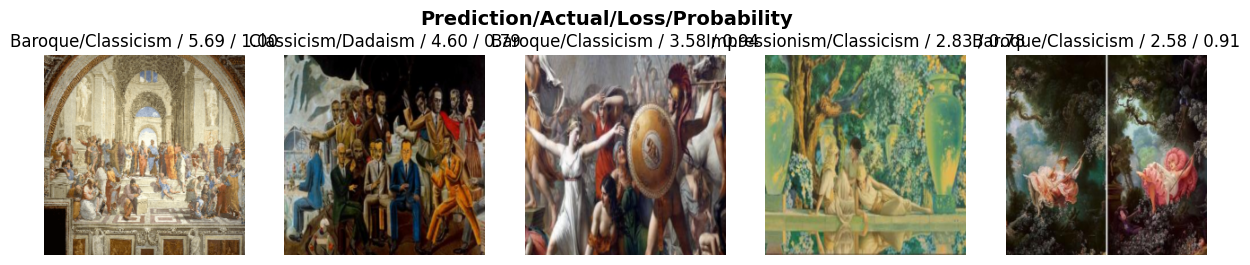

In [23]:
interp.plot_top_losses(5, nrows=1)

In [23]:
learn.export('model.pkl')


PILImage mode=RGB size=1000x641


tensor(2.9939e-07)
This is a: Quercus robur.
Probability it's a encina: 0.0000


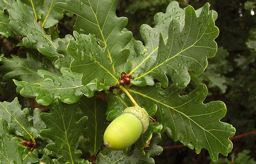

In [13]:
urls = search_images('Quercus robur', max_images=4)
urls[0]

dest = 'Quercus_robur.jpg'
download_url(urls[2], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)
print(PILImage.create('Quercus_robur.jpg'))
type_tree,_,probs = learn.predict(PILImage.create('Quercus_robur.jpg'))
print(probs[0])
print(f"This is a: {type_tree}.")
print(f"Probability it's a encina: {probs[0]:.4f}")
im.to_thumb(256,256)


In [24]:
import gradio as gr

ImportError: cannot import name 'GetCoreSchemaHandler' from 'pydantic' (C:\Users\ASUS\anaconda3\envs\pytorch\lib\site-packages\pydantic\__init__.cp38-win_amd64.pyd)